In [14]:
import numpy as np
import matplotlib.pyplot as plt

import os
import sys
sys.path.insert(0, os.path.abspath('../'))
from fbg import *
from scipy.signal import find_peaks, peak_prominences

In [15]:
filepath = 'demos/spectra_files/psg_trn.txt'
data = psg_to_numpy(filepath, verbose=False)

In [16]:
def generate_spectrum_height(data, peaks, height, strain, n=None, sigma=1e-5, type='Gaussian'):
    
    locs = data[peaks, 0]* (1+7e-7 * strain)
    heights = height * np.ones(len(peaks))

    if n is None:
        n = len(data)

    wavelengths = np.linspace(data[:, 0].min(), data[:, 0].max(), n)
    transmittence = np.zeros(n)

    if type == 'Gaussian':
        for i in range(len(peaks)):
            transmittence += gaussian(wavelengths, sigma=sigma, mu=locs[i], amp=heights[i])
    elif type == 'Lorentzian':
        for i in range(len(peaks)):
            transmittence += gaussian(wavelengths, sigma=sigma, mu=locs[i], amp=heights[i])
    else:
        print('Error: you need to specify a type of function to model the peak')

    transmittence *= heights.max()/transmittence.max()
    transmittence = 1 - transmittence

    return wavelengths, transmittence

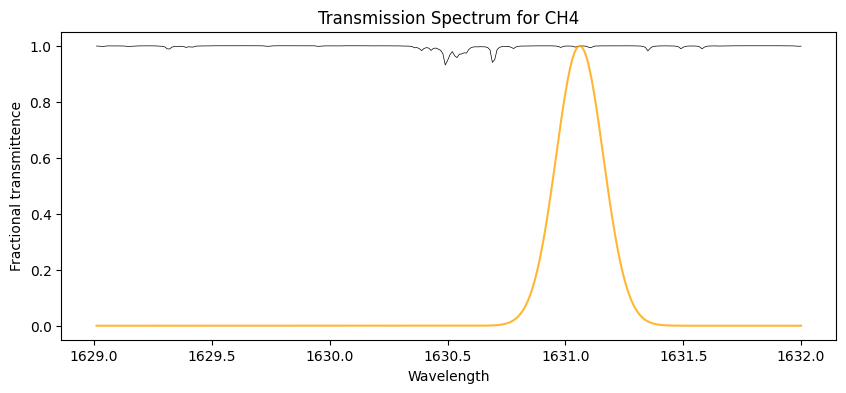

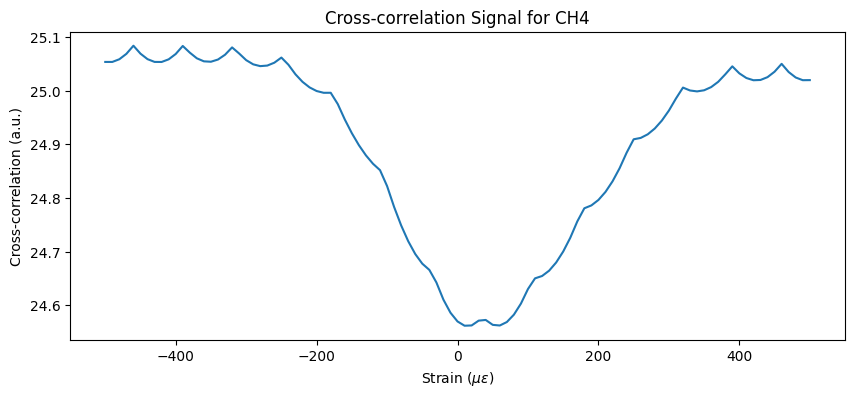

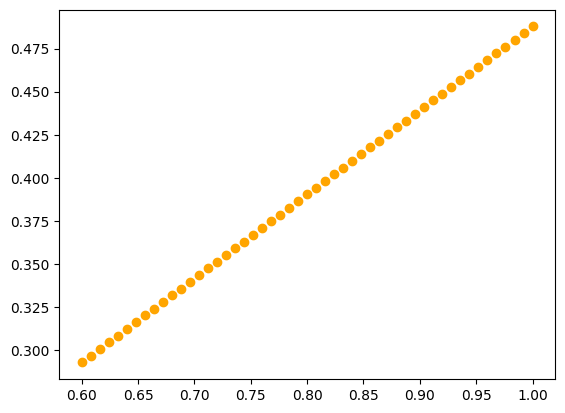

In [17]:
wavelength = data[:,0]*1e3 # converts units to nm
index =  np.where((wavelength>1629) & (wavelength<=1632))[0] # look at a small subset of the data

subset = data[index,:]
subset[:,0] = subset[:,0] * 1e3 # Convert wavelength to nm

# Plot the simulated FBG
threshold_value = 0.95
peaks, properties = locate_peaks(subset[:, 1], threshold=threshold_value, distance=100) # distance=100 correspond to 1nm

step = 101
strain = np.linspace(-500, 500, step)
cross_correlation = np.zeros(step)
height = np.linspace(0.6,1,51)
prominences_p1 = np.zeros(51)

plt.figure(figsize=(10,4))
plt.plot(subset[:, 0], subset[:,1], color='black', linewidth=0.5, label='Original transmission spectrum')

for j in range(len(height)):
    for i in range(len(strain)): 
        wavelength_gauss, trans_gauss = generate_spectrum_height(subset, peaks, height[j], strain[i], n=len(index), sigma=1e-1, type='Gaussian')
        cross_correlation[i] = np.sum(np.multiply((1-trans_gauss), subset[:,1]))
    peaks_SCC, _ = find_peaks(-cross_correlation, distance=step)
    prominences_p1[j] = peak_prominences(-cross_correlation, peaks_SCC)[0] 
        
plt.plot(wavelength_gauss, 1-trans_gauss, '-', color='orange', alpha=0.8, label='Gaussian model')
plt.xlabel('Wavelength'); plt.ylabel('Fractional transmittence')
plt.title('Transmission Spectrum for CH4')
plt.show()

plt.figure(figsize=(10,4))
plt.plot(strain, cross_correlation)
plt.xlabel('Strain ($\mu\epsilon$)'); plt.ylabel('Cross-correlation (a.u.)')
plt.title('Cross-correlation Signal for CH4')
plt.show()

plt.scatter(height, prominences_p1, color='orange')
plt.show()


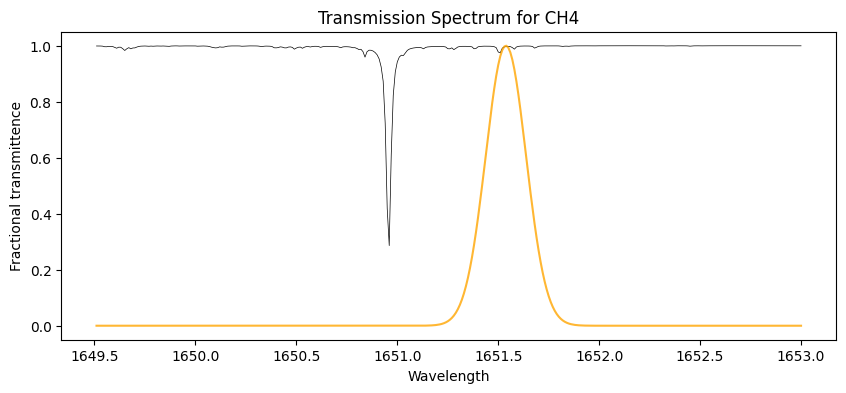

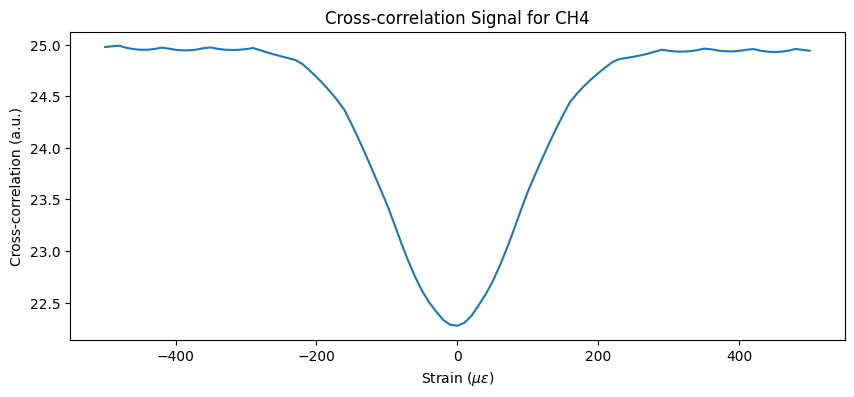

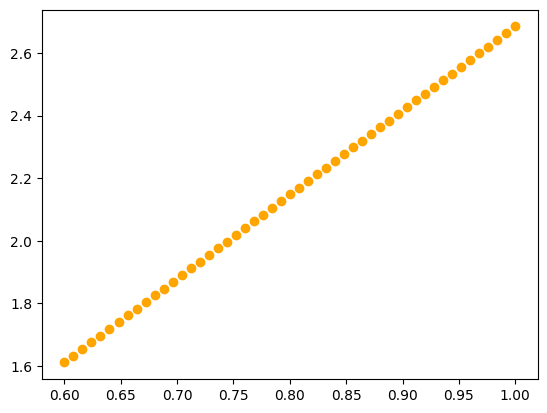

In [18]:
wavelength = data[:,0]*1e3 # converts units to nm
index =  np.where((wavelength>1649.5) & (wavelength<=1653))[0] # look at a small subset of the data

subset = data[index,:]
subset[:,0] = subset[:,0] * 1e3 # Convert wavelength to nm

# Plot the simulated FBG
threshold_value = 0.95
peaks, properties = locate_peaks(subset[:, 1], threshold=threshold_value, distance=100) # distance=100 correspond to 1nm

step = 101
strain = np.linspace(-500, 500, step)
cross_correlation = np.zeros(step)
height = np.linspace(0.6,1,51)
prominences_p2 = np.zeros(51)

plt.figure(figsize=(10,4))
plt.plot(subset[:, 0], subset[:,1], color='black', linewidth=0.5, label='Original transmission spectrum')

for j in range(len(height)):
    for i in range(len(strain)): 
        wavelength_gauss, trans_gauss = generate_spectrum_height(subset, peaks, height[j], strain[i], n=len(index), sigma=1e-1, type='Gaussian')
        cross_correlation[i] = np.sum(np.multiply((1-trans_gauss), subset[:,1]))
    peaks_SCC, _ = find_peaks(-cross_correlation, distance=step)
    prominences_p2[j] = peak_prominences(-cross_correlation, peaks_SCC)[0] 
        
plt.plot(wavelength_gauss, 1-trans_gauss, '-', color='orange', alpha=0.8, label='Gaussian model')
plt.xlabel('Wavelength'); plt.ylabel('Fractional transmittence')
plt.title('Transmission Spectrum for CH4')
plt.show()

plt.figure(figsize=(10,4))
plt.plot(strain, cross_correlation)
plt.xlabel('Strain ($\mu\epsilon$)'); plt.ylabel('Cross-correlation (a.u.)')
plt.title('Cross-correlation Signal for CH4')
plt.show()

plt.scatter(height, prominences_p2, color='orange')
plt.show()


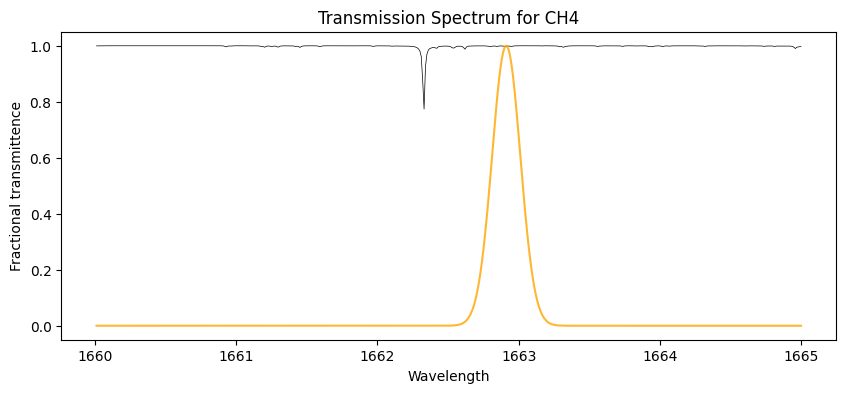

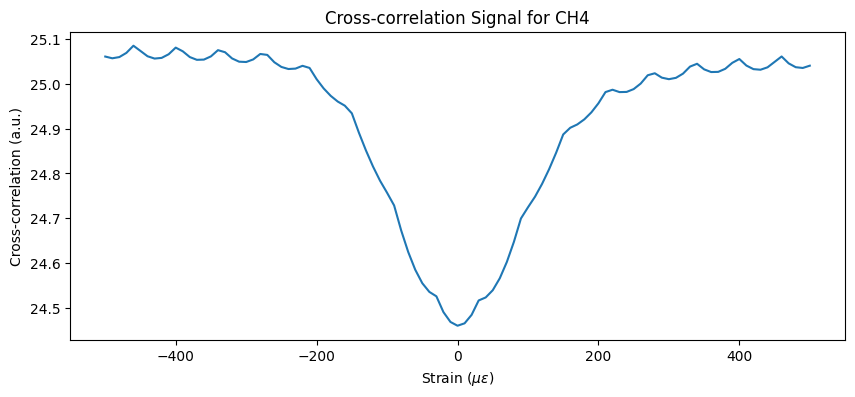

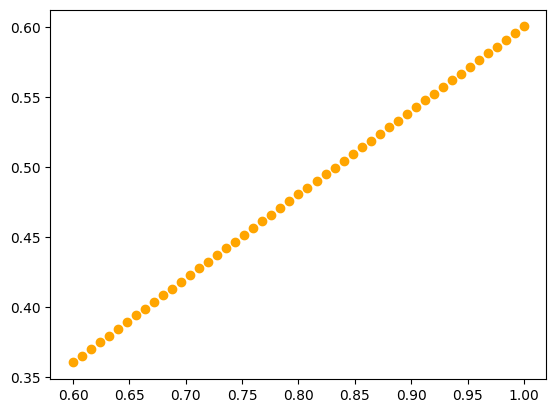

In [19]:
wavelength = data[:,0]*1e3 # converts units to nm
index =  np.where((wavelength>1660) & (wavelength<=1665))[0] # look at a small subset of the data

subset = data[index,:]
subset[:,0] = subset[:,0] * 1e3 # Convert wavelength to nm

# Plot the simulated FBG
threshold_value = 0.95
peaks, properties = locate_peaks(subset[:, 1], threshold=threshold_value, distance=100) # distance=100 correspond to 1nm

step = 101
strain = np.linspace(-500, 500, step)
cross_correlation = np.zeros(step)
height = np.linspace(0.6,1,51)
prominences_p3 = np.zeros(51)

plt.figure(figsize=(10,4))
plt.plot(subset[:, 0], subset[:,1], color='black', linewidth=0.5, label='Original transmission spectrum')

for j in range(len(height)):
    for i in range(len(strain)): 
        wavelength_gauss, trans_gauss = generate_spectrum_height(subset, peaks, height[j], strain[i], n=len(index), sigma=1e-1, type='Gaussian')
        cross_correlation[i] = np.sum(np.multiply((1-trans_gauss), subset[:,1]))
    peaks_SCC, _ = find_peaks(-cross_correlation, distance=step)
    prominences_p3[j] = peak_prominences(-cross_correlation, peaks_SCC)[0] 
        
plt.plot(wavelength_gauss, 1-trans_gauss, '-', color='orange', alpha=0.8, label='Gaussian model')
plt.xlabel('Wavelength'); plt.ylabel('Fractional transmittence')
plt.title('Transmission Spectrum for CH4')
plt.show()

plt.figure(figsize=(10,4))
plt.plot(strain, cross_correlation)
plt.xlabel('Strain ($\mu\epsilon$)'); plt.ylabel('Cross-correlation (a.u.)')
plt.title('Cross-correlation Signal for CH4')
plt.show()

plt.scatter(height, prominences_p3, color='orange')
plt.show()


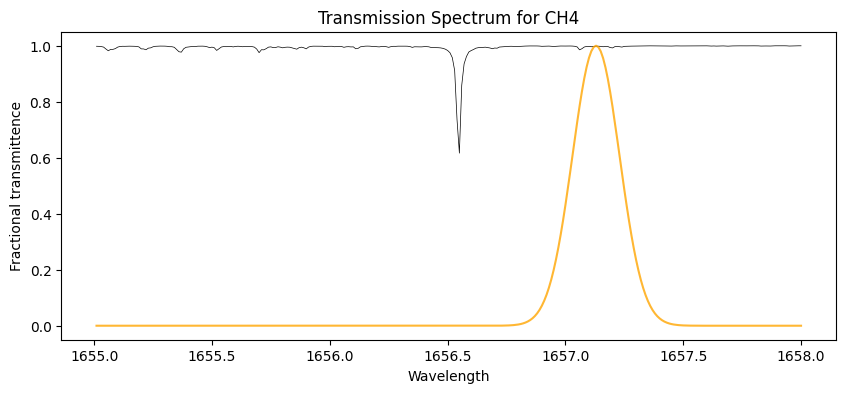

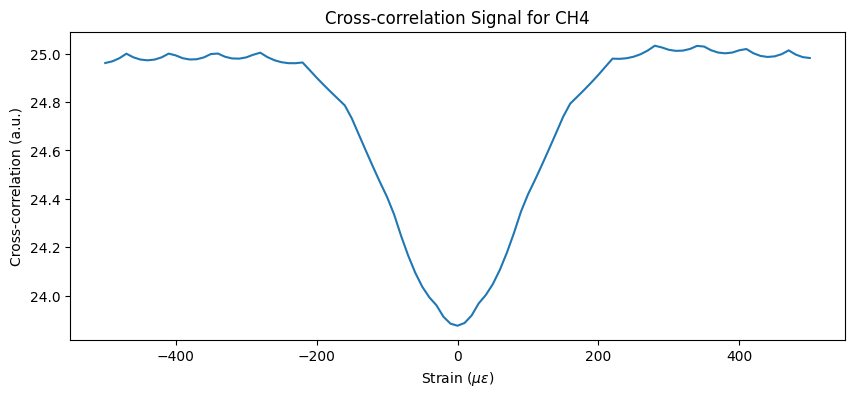

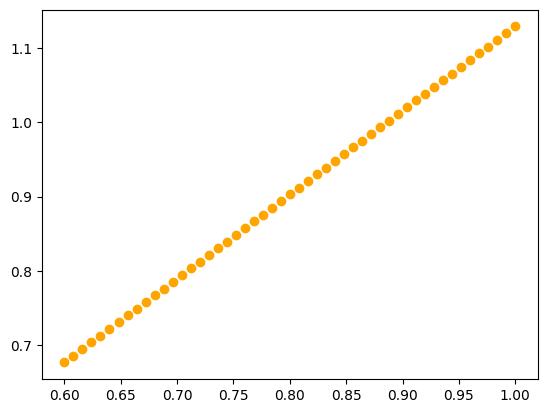

In [23]:
wavelength = data[:,0]*1e3 # converts units to nm
index =  np.where((wavelength>1655) & (wavelength<=1658))[0] # look at a small subset of the data

subset = data[index,:]
subset[:,0] = subset[:,0] * 1e3 # Convert wavelength to nm

# Plot the simulated FBG
threshold_value = 0.95
peaks, properties = locate_peaks(subset[:, 1], threshold=threshold_value, distance=100) # distance=100 correspond to 1nm

step = 101
strain = np.linspace(-500, 500, step)
cross_correlation = np.zeros(step)
height = np.linspace(0.6,1,51)
prominences_p4 = np.zeros(51)

plt.figure(figsize=(10,4))
plt.plot(subset[:, 0], subset[:,1], color='black', linewidth=0.5, label='Original transmission spectrum')

for j in range(len(height)):
    for i in range(len(strain)): 
        wavelength_gauss, trans_gauss = generate_spectrum_height(subset, peaks, height[j], strain[i], n=len(index), sigma=1e-1, type='Gaussian')
        cross_correlation[i] = np.sum(np.multiply((1-trans_gauss), subset[:,1]))
    peaks_SCC, _ = find_peaks(-cross_correlation, distance=step)
    prominences_p4[j] = peak_prominences(-cross_correlation, peaks_SCC)[0] 
        
plt.plot(wavelength_gauss, 1-trans_gauss, '-', color='orange', alpha=0.8, label='Gaussian model')
plt.xlabel('Wavelength'); plt.ylabel('Fractional transmittence')
plt.title('Transmission Spectrum for CH4')
plt.show()

plt.figure(figsize=(10,4))
plt.plot(strain, cross_correlation)
plt.xlabel('Strain ($\mu\epsilon$)'); plt.ylabel('Cross-correlation (a.u.)')
plt.title('Cross-correlation Signal for CH4')
plt.show()

plt.scatter(height, prominences_p4, color='orange')
plt.show()


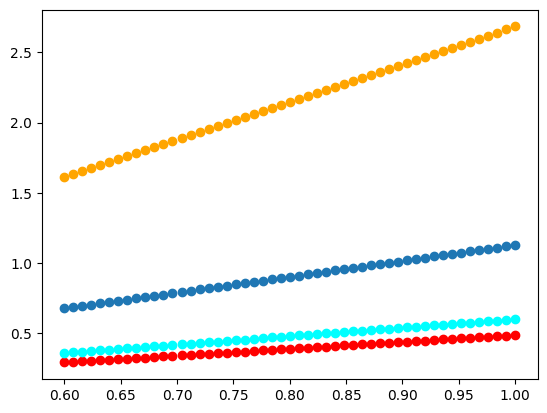

In [24]:
plt.scatter(height, prominences_p1, color='red')
plt.scatter(height, prominences_p2, color='orange')
plt.scatter(height, prominences_p3, color='cyan')
plt.scatter(height, prominences_p4)
plt.show()